## Empirical evaluation of Fitts’s law - User pointing Experiment
#### Implementation of [pointing experiment]("https://ergo.human.cornell.edu/FittsLaw/FittsLaw.html") proposed from the Ergonomics Web at Cornell University. 

### A) General Terms 
* A: Amplitude of the movement
* W: Width of the target
* ID: Index of difficulty of the task
* MT: Movement time

### B) Definitions
#### 1. Fits Law:
- The law predicts that the time required to rapidly move to a target area is a function of the ratio between the distance to the target and the width of the target.
- Example: To reach a target we move the mouse cursor and click/select on it, Fitts' law describes how the distance between the start point and the target (A), and the size of the target (W) impacts on the index of difficulty of the task (ID).

#### 2. Amplitude of the movement (A):
- The distance between the start point and the target.

#### 3. Width of the target (W):
- The size of the target.

#### 4. Index of difficulty (ID):
- The formulation of Fitts's index of difficulty ( carries the unit "bits") is most used in the human–computer interaction and is called Shannon formulation:
* ID = log2(A/W + 1)

#### 5. Movement Time (MT):
- The time MT needed for a user to reach a target is linearly correlated to the index of difficulty ID.

* MT = a + b × ID
where a and b are constants determined through linear regression.

### C) Analysis

1.	Five distinct experiments were conducted in order to analyze Fitts' law's empirical evaluation utilizing the Implementation of Pointing Experiment, which was proposed by Cornell University's Ergonomics Web. 
2.	The initial set of data used in the study belonged to Celine. Additionally, four tests were conducted, three of which used identical Celine data; the only differences were in the values of the constants ‘a’ and ‘b’. 
3.	The final experiment was conducted with amplitude and width values that were higher than those of the previous one.
4.	Strangely, ID does not appear to have an effect on the MT movement time in experiment 1 (Celine's data) and experiment 4 (Mobile Hand), despite what Fitts' law states. 
5.	Additionally, the R2 values I discovered here by linear modelling, which are R2=0.008 in experiment 1 and R2 = 0.058 in experiment 4, differ from the R2 values supplied by the experimental software, which are R2=0.218 in experiment 1 and R2 = 0.172 in experiment 4.
6.	Given that the R2 values are more than 0.5, Experiments 2 and 3 appear to have a marginally better ID effect on MT. 
7.	The greatest value of R2, 0.768, is obtained in Experiment 5 with larger width and amplitude. This does not imply that it would occur on a regular basis.
8.	The R2 differs regardless of the error, there is no correlation between the error and the linear model of every experiment.
9.	Since different kinds of amplitude appear to be linear at each moment, there is no correlation with the amplitude factor. The same applies for the width factor too.
10.	The value of R2 found by R linear modelling and the value found by the experiment software appear to be quite close in this two experiments (2 & 3).
11. Plotting the Amplitude and Width against ID and MT in my previous set of analyses revealed no linear relationship between them. Furthermore, the linearity of model is not more affected by the values of the constants a and b.
12.	Remodelling the datasets using the same formula from the experimental software led to the proposal of new ID and new MT. I noticed something intriguing, the R2 value was 1 across all of them with perfect linearity. However, this cannot be confirmed to be true as it needs more analysis and find the flaws, reassure principle formula, calculation methods ( R programming ) and results. (to be continued on trailing on this…)
13.	For the experimental software, the Fitts law principle cannot be satisfied by any particular collection of experiments because all trials yield ambiguous findings. Certain experiments exhibit some degree of linearity, whereas others do not.
14.	Overall, the analysis provides insight into the experimental model's lack of accuracy and signifies that conducting our own modelling could yield a more comprehensive knowledge of Fitts law linearity while adhering to the principle.



### D) References

* Experiment from Ergonomics Web at Cornell University: [Reference]("https://ergo.human.cornell.edu/FittsLaw/FittsLaw.html")
* Fitts Law: [Reference]("https://en.wikipedia.org/wiki/Fitts%27s_law")
* Journal of Experimental Psychology - Fitts 1954: [Reference]("http://www2.psychology.uiowa.edu/faculty/mordkoff/InfoProc/pdfs/Fitts%201954.pdf")
* Extending Fitts' Law to Two-Dimensional Tasks MacKenzie1 and William Buxton - 1992: [Reference]("http://www.billbuxton.com/fitts92.html")
* Celine Coutrix Report: [Reference]("https://gricad-gitlab.univ-grenoble-alpes.fr/coutrixc/m2r_pointingxp/-/blob/main/journal.md?ref_type=heads")

### Loading libraries

In [49]:
library(ggplot2)
library(dplyr)

### Loading data of different experiments

In [50]:
#Experiment 1 - Madame Celine's shared Data
exp1_mean_df <- read.csv("../data/celines_mean_mt_data.csv", header=T)
exp1_raw_df <- read.csv("../data/celines_raw_data.csv", header=T)

#Experiment 2 - My data experimented with laptop and mouse 
exp2_mean_df <- read.csv("../data/mouse_laptop_mean_mt_data.csv", header=T)
exp2_raw_df <- read.csv("../data/mouse_laptop_raw_data.csv", header=T)

#Experiment 3 - My data experimented with laptop and touchpad
exp3_mean_df <- read.csv("../data/touchpad_laptop_mean_mt_data.csv", header=T)
exp3_raw_df <- read.csv("../data/touchpad_laptop_raw_data.csv", header=T)

#Experiment 4 - My data experimented with mobile phone and finger touch
exp4_mean_df <- read.csv("../data/mobile_hand_mean_mt_data.csv", header=T)
exp4_raw_df <- read.csv("../data/mobile_hand_raw_data.csv", header=T)

#Experiment 5 - Data with different amplitude and width values (greater) experimented with laptop and mouse 
exp5_mean_df <- read.csv("../data/different_A_W_values_mean_data.csv", header=T)
exp5_raw_df <- read.csv("../data/different_A_W_values_raw_data.csv", header=T)


print("---- Sample structure of data ---- ")
head(exp1_mean_df)

[1] "---- Sample structure of data ---- "


,A,W,MT,ID
,<int>,<int>,<int>,<int>
1,16,1,1611,4
2,32,1,1881,5
3,32,2,1276,4
4,8,4,949,2
5,8,1,1440,3
6,16,2,1586,3


### Input and output data from the experimental software tabulated

| S.No | Experiment                 | Amplitude A     | Width W    | Error | MT                                      | R2    |
|------|----------------------------|-----------------|------------|-------|-----------------------------------------|-------|
| 1    | Celine's data              | 8,16,32         | 1,2,4      | 4     | MT = 1001.293 + 140.589 log(A/W + 1)    | 0.218 |
| 2    | Mouse Laptop               | 8,16,32         | 1,2,4      | 8     | MT = 700.250 + 265.425 log(A/W + 1)     | 0.589 |
| 3    | Touchpad Laptop            | 8,16,32         | 1,2,4      | 2     | MT = 1007.858 + 220.150 log(A/W + 1)    | 0.639 |
| 4    | Mobile Hand                | 8,16,32         | 1,2,4      | 0     | MT = 479.654 + 11.869 log(A/W + 1)      | 0.172 |
| 5    | Different A & W values     | 128,256,512     | 16,32,64   | 0     | MT = 286.806 + 204.191 log(A/W + 1)     | 0.768 |



### Plotting the data together with the linear regression for raw data of different experiments


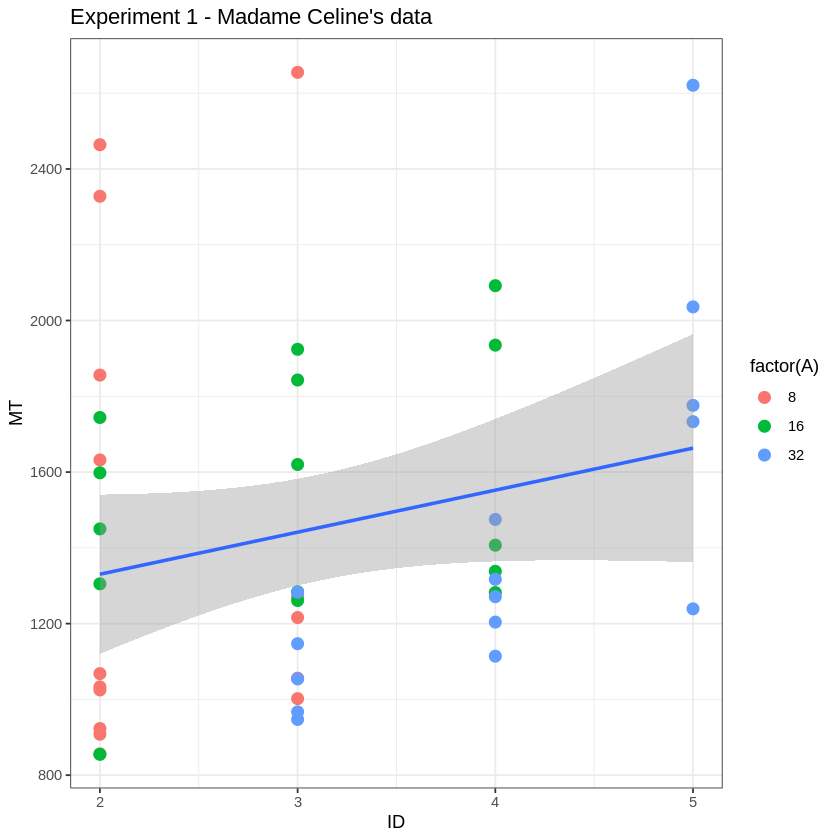

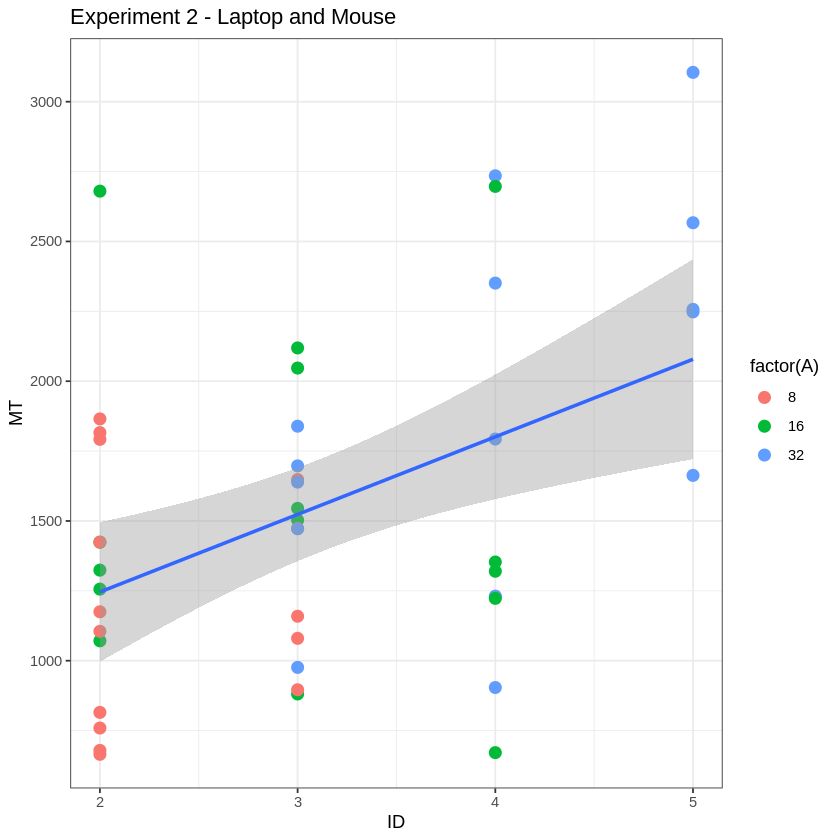

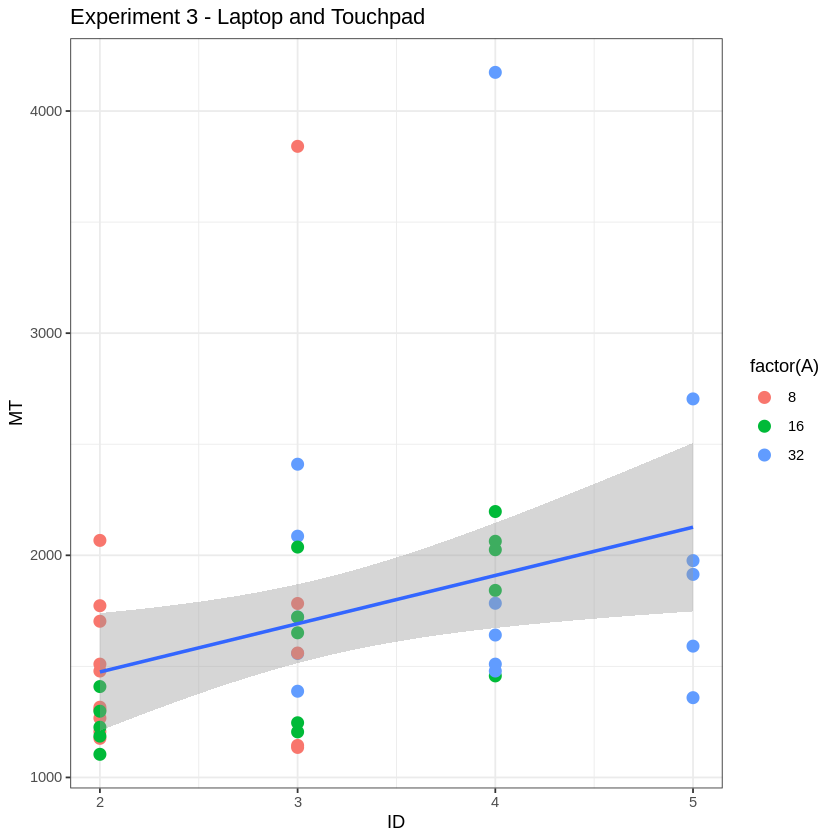

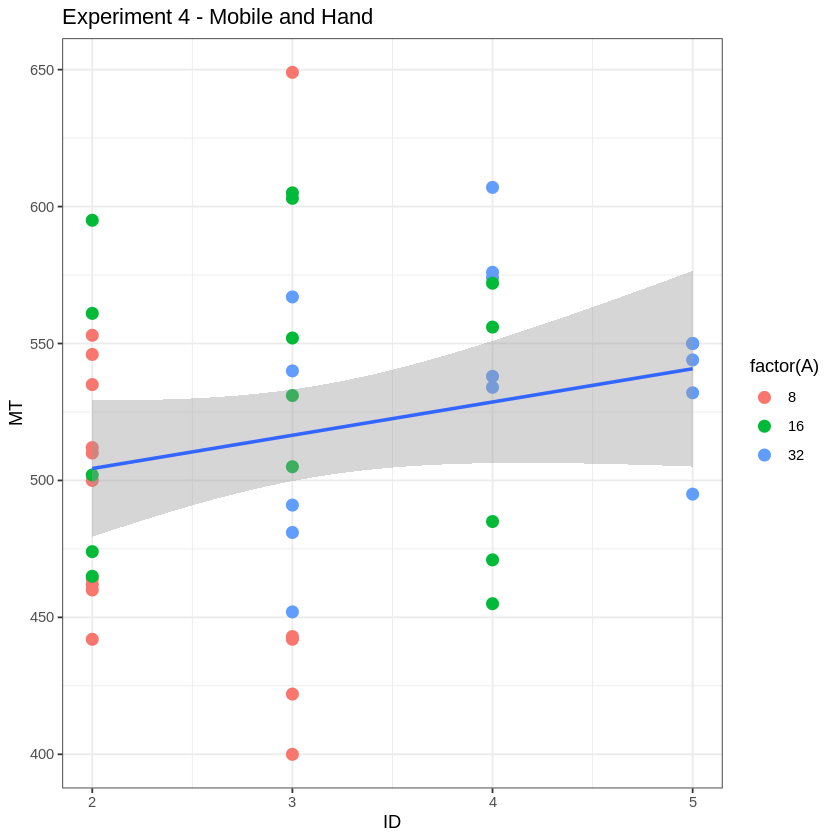

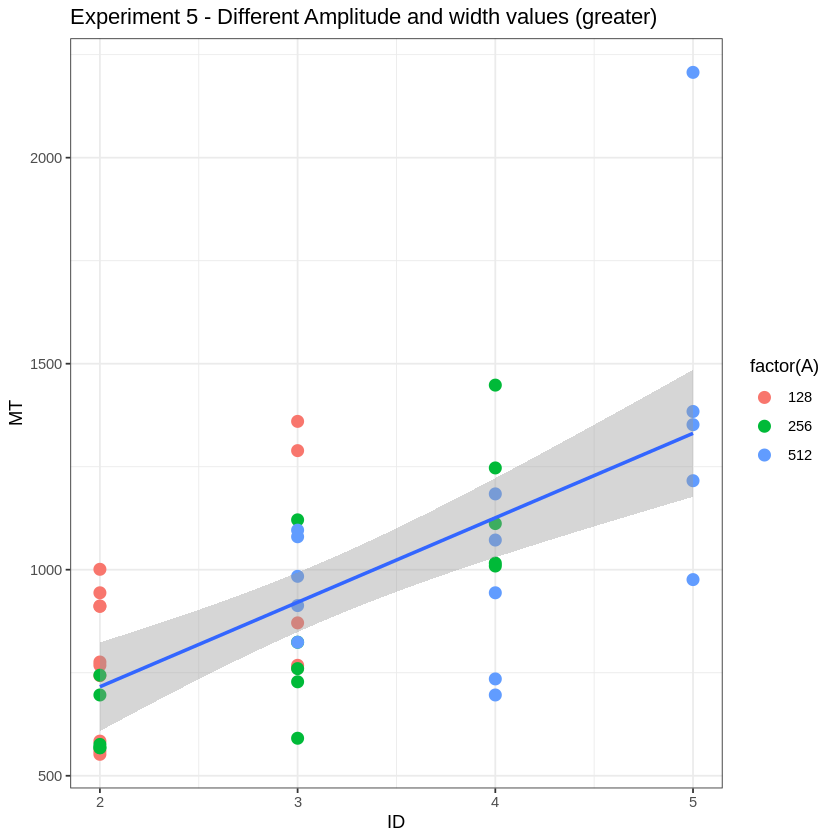

In [51]:
#Experiment 1 Madame Celine's mean MT data linear regression
ggplot(exp1_raw_df, aes(ID, MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 1 - Madame Celine's data")

#Experiment 2 laptop and mouse mean MT data linear regression
ggplot(exp2_raw_df, aes(ID, MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 2 - Laptop and Mouse")

#Experiment 3 laptop and touchpad mean MT data linear regression
ggplot(exp3_raw_df, aes(ID, MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 3 - Laptop and Touchpad")

#Experiment 4 mobile and hand mean MT data linear regression
ggplot(exp4_raw_df, aes(ID, MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 4 - Mobile and Hand")

#Experiment 5 - Data with different amplitude and width values (greater) 
ggplot(exp5_raw_df, aes(ID, MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 5 - Different Amplitude and width values (greater)")


### Plotting the data together with the linear regression for mean MTdata of different experiments

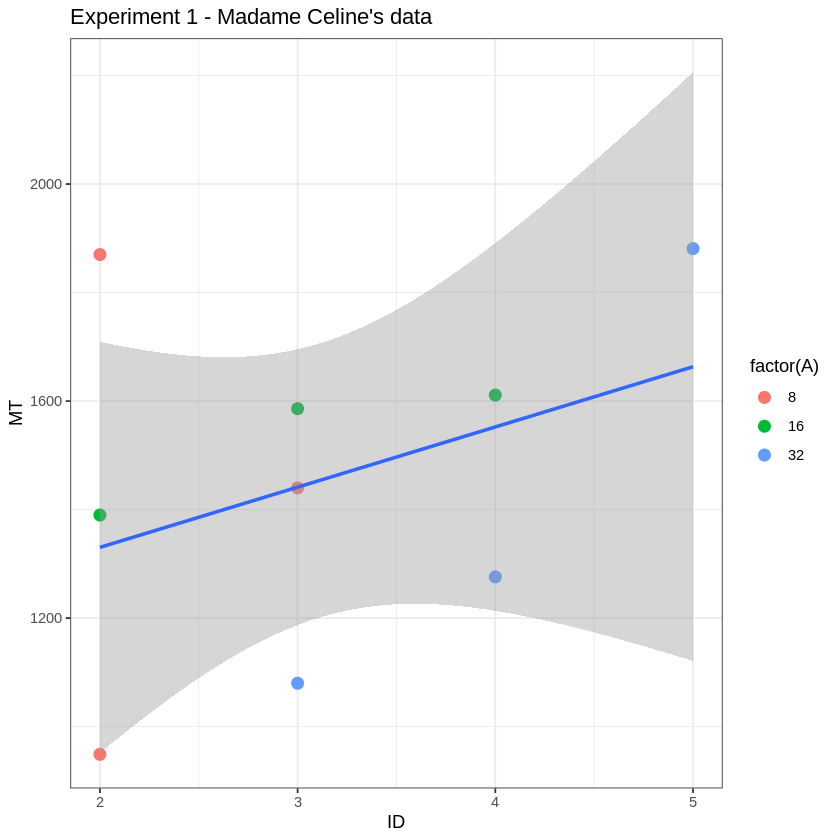

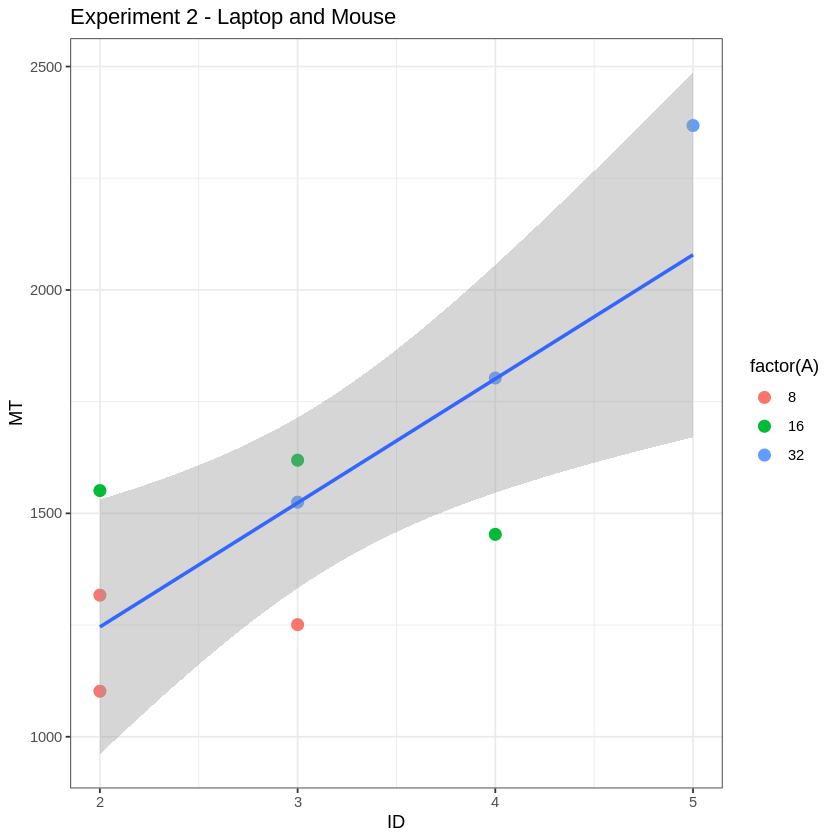

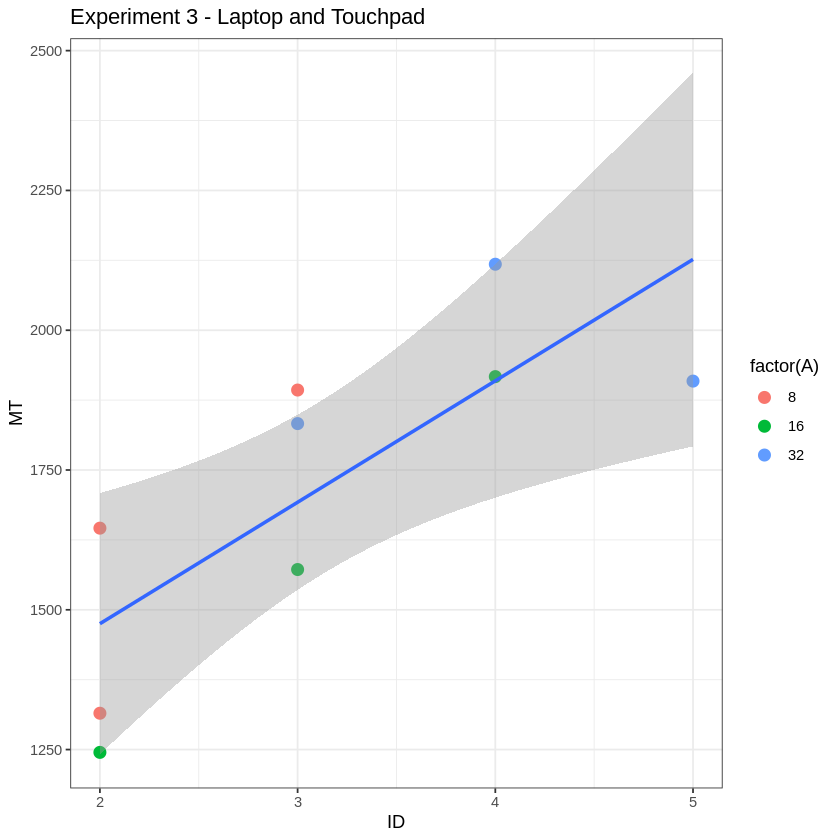

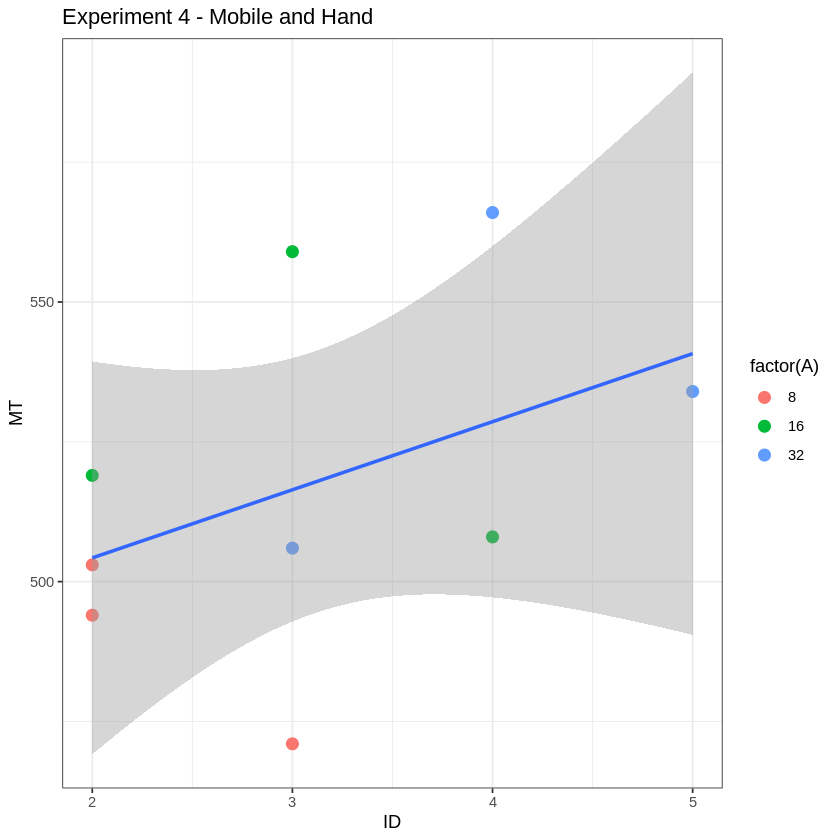

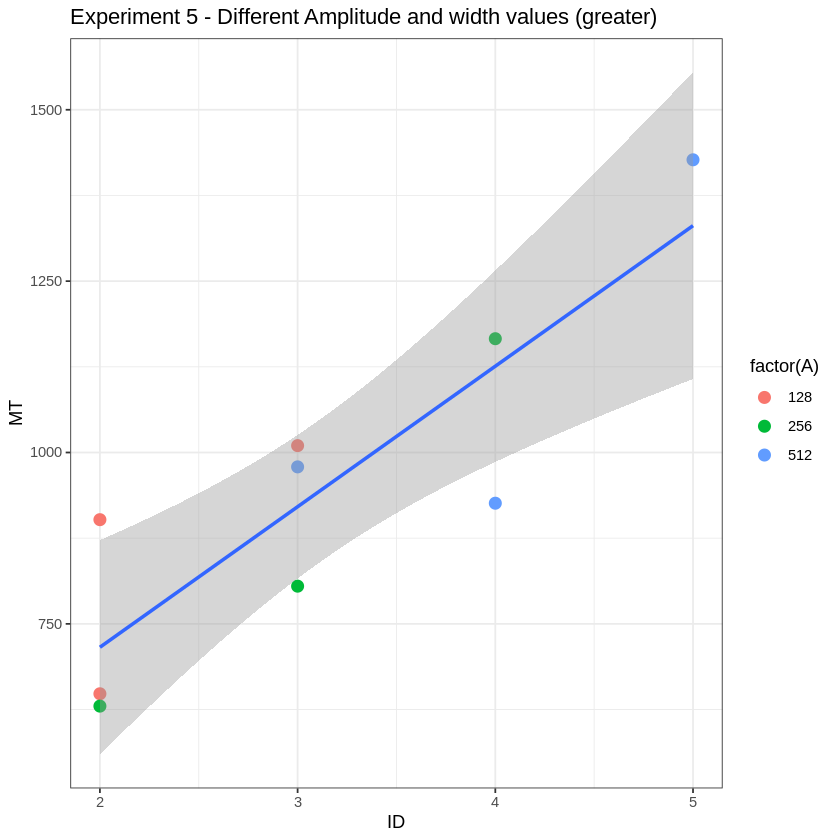

In [52]:
#Experiment 1 Madame Celine's mean MT data linear regression
ggplot(exp1_mean_df, aes(ID, MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 1 - Madame Celine's data")

#Experiment 2 laptop and mouse mean MT data linear regression
ggplot(exp2_mean_df, aes(ID, MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 2 - Laptop and Mouse")

#Experiment 3 laptop and touchpad mean MT data linear regression
ggplot(exp3_mean_df, aes(ID, MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 3 - Laptop and Touchpad")

#Experiment 4 mobile and hand mean MT data linear regression
ggplot(exp4_mean_df, aes(ID, MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 4 - Mobile and Hand")

#Experiment 5 - Data with different amplitude and width values (greater) 
ggplot(exp5_mean_df, aes(ID, MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 5 - Different Amplitude and width values (greater)")

### Linear modelling for MeanMT data for each experiment 

In [53]:
#Experiment 1 Madame Celine's mean MT data linear modelling
print("*** Experiment 1 - Madame Celine's: ***")
exp1_model <- lm(MT~ID, data = exp1_mean_df)
summary(exp1_model)
print("----------------------------------------------------------------------")

#Experiment 2 laptop and mouse mean MT data linear modelling
print("*** Experiment 2 - Laptop and Mouse: ***")
exp2_model <- lm(MT~ID, data = exp2_mean_df)
summary(exp2_model)
print("----------------------------------------------------------------------")

#Experiment 3 laptop and touchpad mean MT data linear modelling
print("*** Experiment 3 - Laptop and Touchpad: ***")
exp3_model <- lm(MT~ID, data = exp3_mean_df)
summary(exp3_model)
print("----------------------------------------------------------------------")

#Experiment 4 mobile and hand mean MT data linear modelling
print("*** Experiment 4 - Mobile and Finger touch: ***")
exp4_model <- lm(MT~ID, data = exp4_mean_df)
summary(exp4_model)
print("----------------------------------------------------------------------")

#Experiment 5 - Data with different amplitude and width values (greater) experimented with laptop and mouse 
print("*** Experiment 5 - Data with different amplitude and width values (greater): ***")
exp5_model <- lm(MT~ID, data = exp5_mean_df)
summary(exp5_model)
print("----------------------------------------------------------------------")

[1] "*** Experiment 1 - Madame Celine's: ***"



Call:
lm(formula = MT ~ ID, data = exp1_mean_df)

Residuals:
   Min     1Q Median     3Q    Max 
-381.4 -276.3   58.7  144.7  539.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   1108.4      351.1   3.158    0.016 *
ID             111.0      107.5   1.032    0.336  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 320.5 on 7 degrees of freedom
Multiple R-squared:  0.1321,	Adjusted R-squared:  0.008146 
F-statistic: 1.066 on 1 and 7 DF,  p-value: 0.3363


[1] "----------------------------------------------------------------------"
[1] "*** Experiment 2 - Laptop and Mouse: ***"



Call:
lm(formula = MT ~ ID, data = exp2_mean_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-348.10 -143.88    1.90   95.51  305.12 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   690.65     264.17   2.614   0.0347 *
ID            277.61      80.89   3.432   0.0110 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 241.2 on 7 degrees of freedom
Multiple R-squared:  0.6273,	Adjusted R-squared:  0.574 
F-statistic: 11.78 on 1 and 7 DF,  p-value: 0.01095


[1] "----------------------------------------------------------------------"
[1] "*** Experiment 3 - Laptop and Touchpad: ***"



Call:
lm(formula = MT ~ ID, data = exp3_mean_df)

Residuals:
   Min     1Q Median     3Q    Max 
-230.1 -160.1    7.5  170.9  208.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1040.75     216.43   4.809  0.00195 **
ID            217.19      66.27   3.277  0.01354 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 197.6 on 7 degrees of freedom
Multiple R-squared:  0.6054,	Adjusted R-squared:  0.5491 
F-statistic: 10.74 on 1 and 7 DF,  p-value: 0.01354


[1] "----------------------------------------------------------------------"
[1] "*** Experiment 4 - Mobile and Finger touch: ***"



Call:
lm(formula = MT ~ ID, data = exp4_mean_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.425 -10.425  -6.775  14.750  42.575 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  479.900     32.543  14.746 1.58e-06 ***
ID            12.175      9.964   1.222    0.261    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.71 on 7 degrees of freedom
Multiple R-squared:  0.1758,	Adjusted R-squared:  0.05804 
F-statistic: 1.493 on 1 and 7 DF,  p-value: 0.2613


[1] "----------------------------------------------------------------------"
[1] "*** Experiment 5 - Data with different amplitude and width values (greater): ***"



Call:
lm(formula = MT ~ ID, data = exp5_mean_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-199.90  -85.88   40.10   89.11  186.12 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   305.85     144.72   2.113  0.07243 . 
ID            205.01      44.31   4.627  0.00241 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 132.1 on 7 degrees of freedom
Multiple R-squared:  0.7536,	Adjusted R-squared:  0.7184 
F-statistic: 21.41 on 1 and 7 DF,  p-value: 0.002407


[1] "----------------------------------------------------------------------"


### Plotting the data with A and W against ID , A and W against MT to observe the correlation; if any

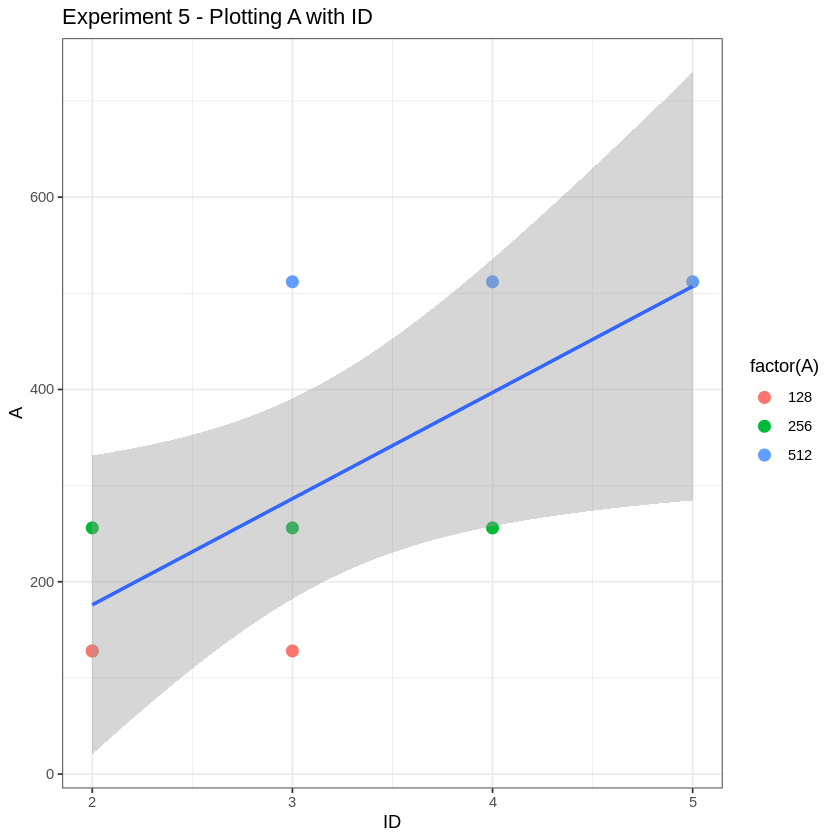

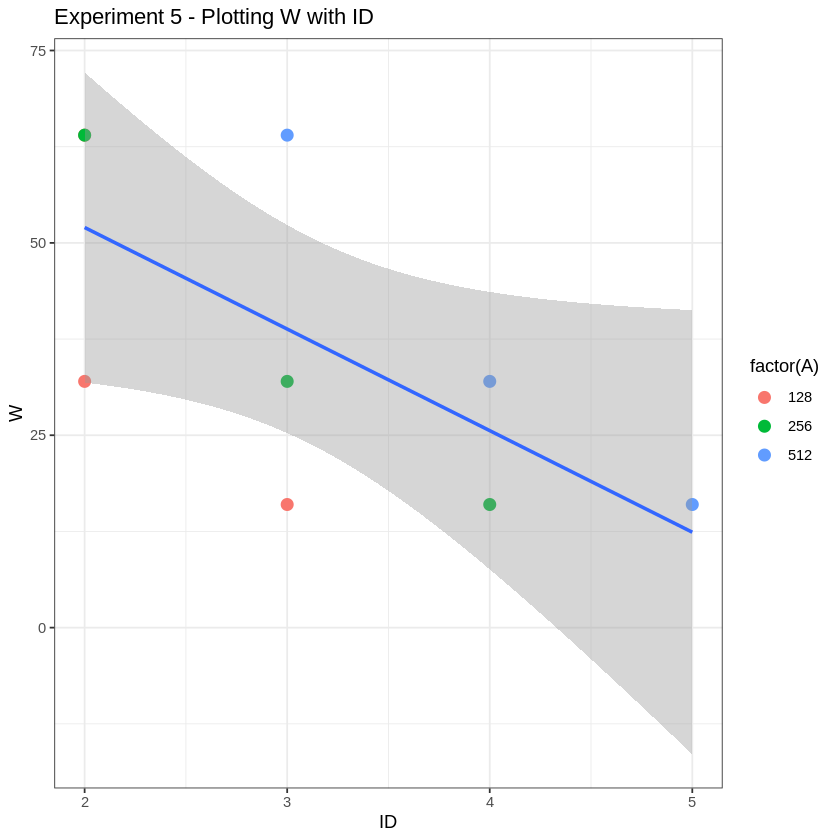

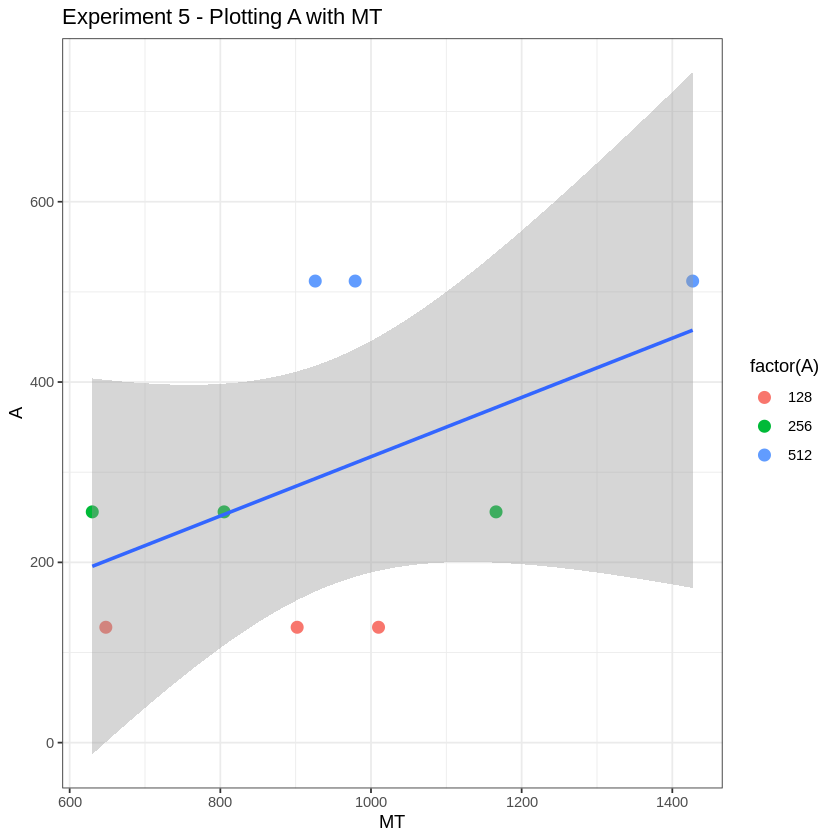

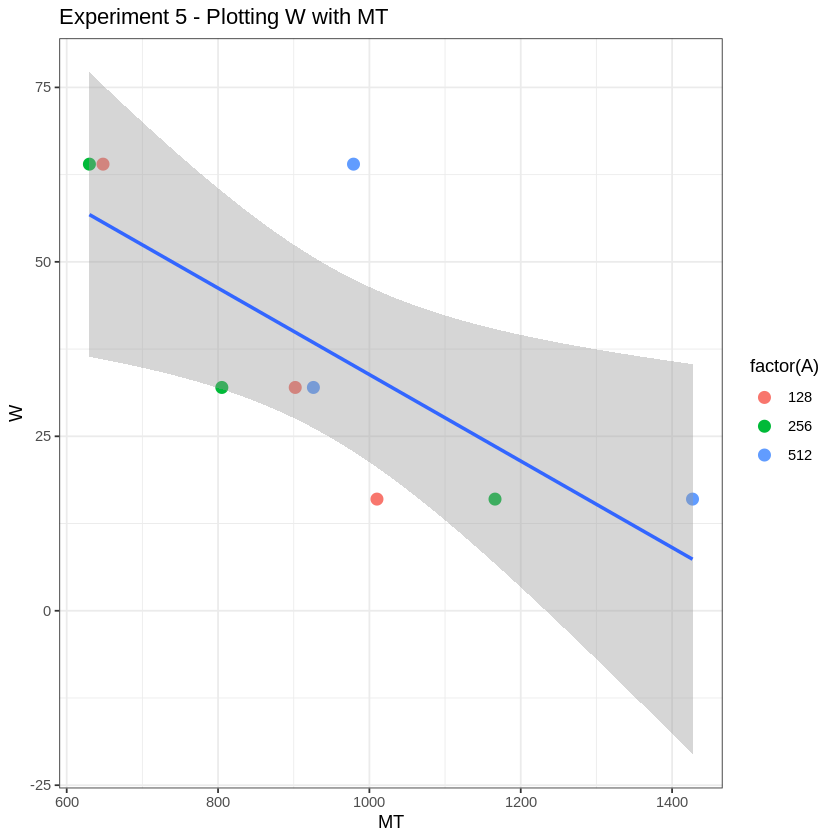

In [64]:
# Plotting A and W with ID to analyse
ggplot(exp5_mean_df, aes(ID, A)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 5 - Plotting A with ID ")
ggplot(exp5_mean_df, aes(ID, W)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 5 - Plotting W with ID ")

# Plotting A and W with MT to analyse
ggplot(exp5_mean_df, aes(MT, A)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 5 - Plotting A with MT ")
ggplot(exp5_mean_df, aes(MT, W)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 5 - Plotting W with MT ")


#### Further analysis by re modelling using the data ( Results are intruiging by showing perfect linearilty ; have to be experimented/analysed more to find the flaws and reassure the formula principles and its results )

#### Re-modelling experiments with new ID and new MT using the formula used in experimental software
* ID = log2(A/W + 1)
* MT = a + b × ID

* Values of a and b:
1. Experiment 1: a= 1001.293 , b = 140.589
2. Experiment 2: a= 700.250 , b = 265.425
3. Experiment 3: a= 1007.858 , b = 220.150
4. Experiment 4: a= 479.654 , b = 11.869
5. Experiment 4: a= 286.806 , b = 204.191

In [65]:
exp1_mean_df  <- exp1_mean_df %>% mutate(new_ID = as.integer(log2((A/W)+1)), new_MT = as.integer(1001.293 + (140.589 *new_ID)))
exp2_mean_df  <- exp2_mean_df %>% mutate(new_ID = as.integer(log2((A/W)+1)), new_MT = as.integer(700.250 + (265.425 *new_ID )))
exp3_mean_df  <- exp3_mean_df %>% mutate(new_ID = as.integer(log2((A/W)+1)), new_MT = as.integer(1007.858 + (220.150 *new_ID )))
exp4_mean_df  <- exp4_mean_df %>% mutate(new_ID = as.integer(log2((A/W)+1)), new_MT = as.integer(479.654 + (11.869 *new_ID)))
exp5_mean_df  <- exp5_mean_df %>% mutate(new_ID = as.integer(log2((A/W)+1)), new_MT = as.integer(286.806 + (204.191*new_ID)))


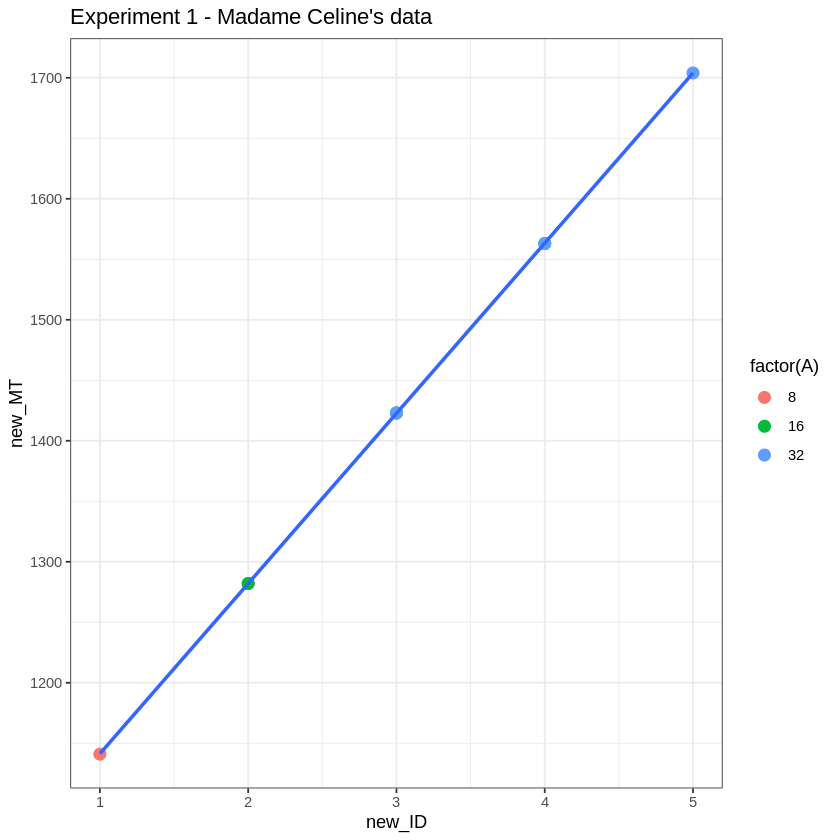

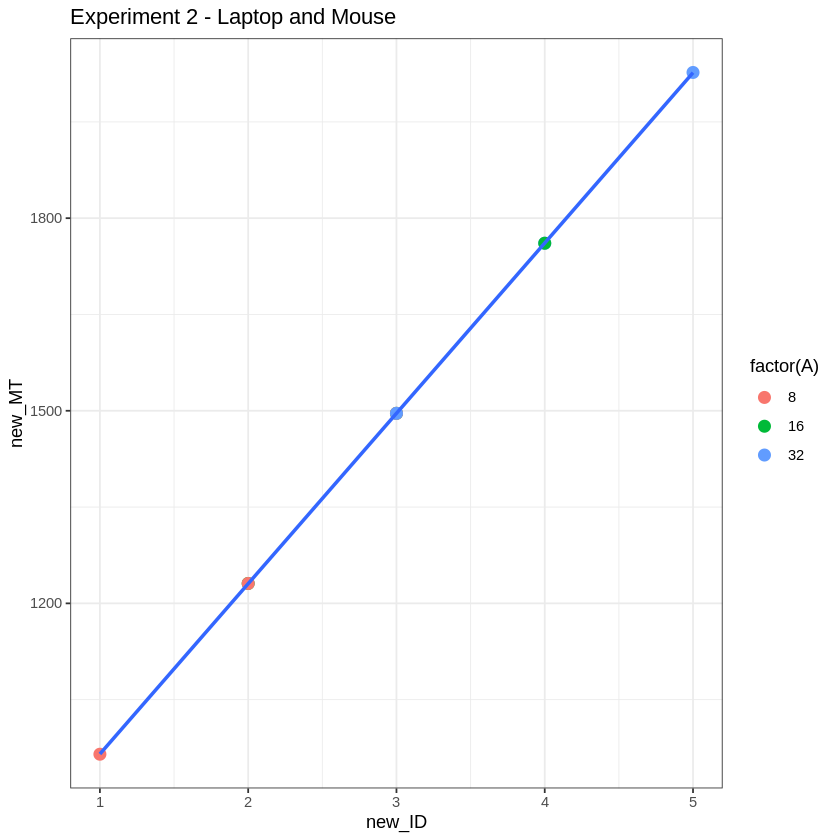

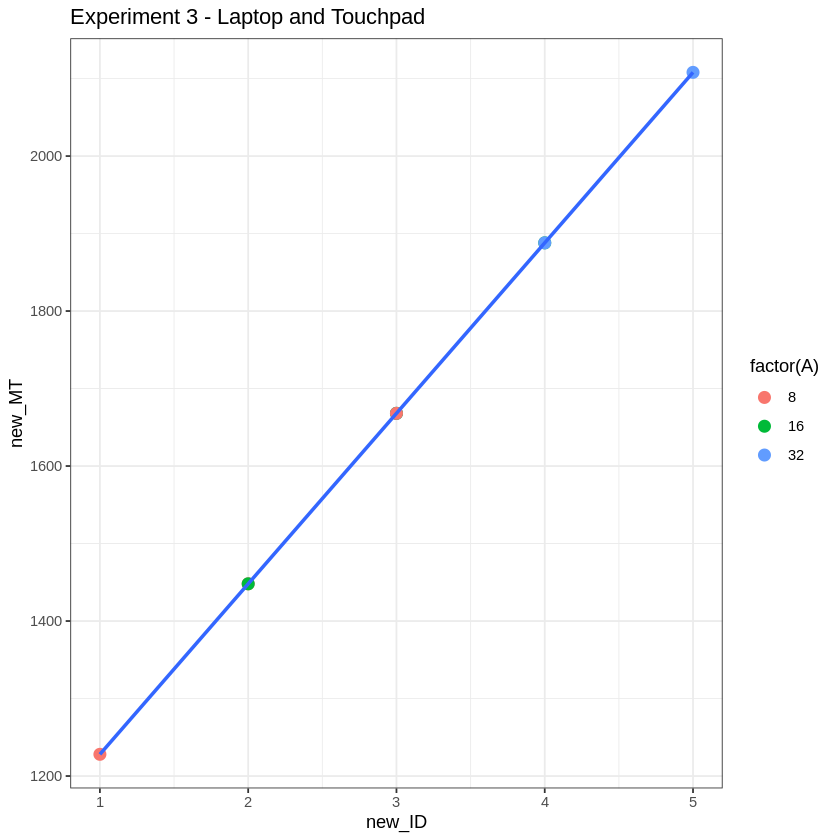

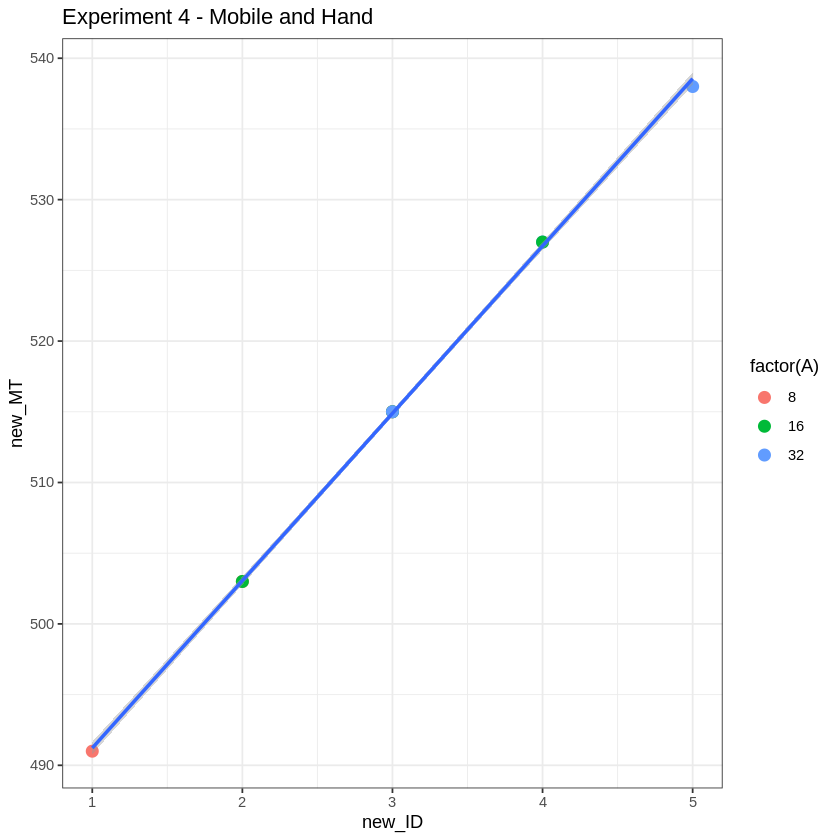

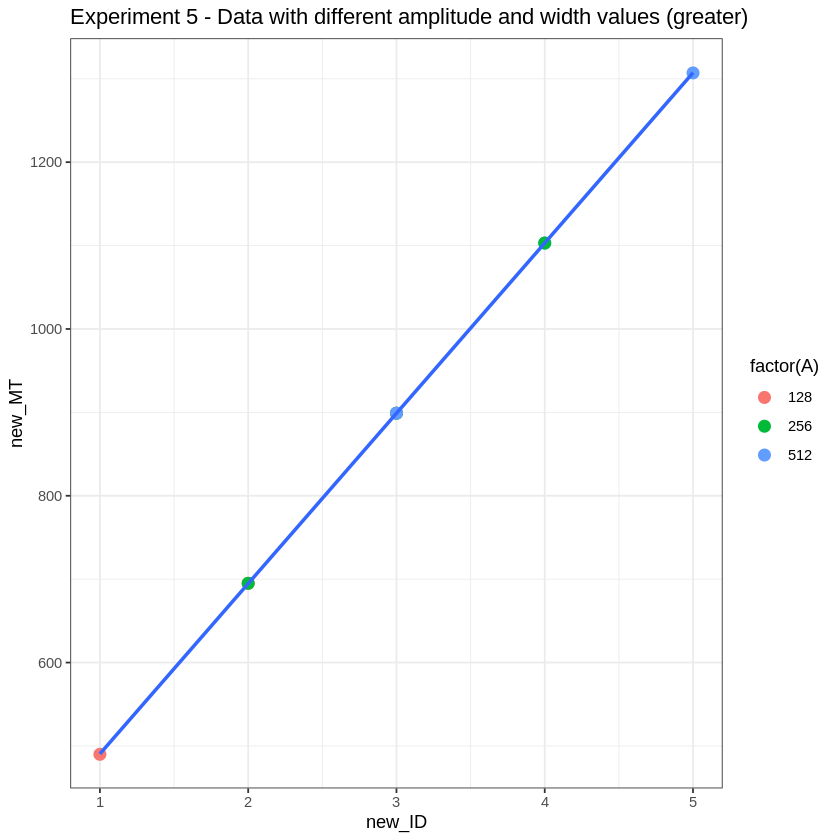

In [66]:
ggplot(exp1_mean_df, aes(new_ID, new_MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 1 - Madame Celine's data")

ggplot(exp2_mean_df, aes(new_ID, new_MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 2 - Laptop and Mouse")

ggplot(exp3_mean_df, aes(new_ID, new_MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 3 - Laptop and Touchpad")

ggplot(exp4_mean_df, aes(new_ID, new_MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 4 - Mobile and Hand")

ggplot(exp5_mean_df, aes(new_ID, new_MT)) +
  geom_point(aes(colour=factor(A)), size = 3) +
  geom_smooth(method='lm', formula = y ~ x) + theme_bw() +
  ggtitle("Experiment 5 - Data with different amplitude and width values (greater)")

In [67]:
print("*** Experiment 1 - Madame Celine's: ***")
model1 <- lm(new_MT~new_ID, data = exp1_mean_df)
summary(model1)
print("----------------------------------------------------------------------")

print("*** Experiment 2 - Laptop and Mouse: ***")
model2 <- lm(new_MT~new_ID, data =exp2_mean_df)
summary(model2)
print("----------------------------------------------------------------------")

print("*** Experiment 3 - Laptop and Touchpad: ***")
model3 <- lm(new_MT~new_ID, data = exp3_mean_df)
summary(model3)
print("----------------------------------------------------------------------")

print("*** Experiment 4 - Mobile and Finger touch: ***")
model4 <- lm(new_MT~new_ID, data = exp4_mean_df)
summary(model4)
print("----------------------------------------------------------------------")

print("*** Experiment 5 - Data with different amplitude and width values (greater): ***")
model5 <- lm(new_MT~new_ID, data = exp5_mean_df)
summary(model5)
print("----------------------------------------------------------------------")

[1] "*** Experiment 1 - Madame Celine's: ***"



Call:
lm(formula = new_MT ~ new_ID, data = exp1_mean_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3333 -0.3333  0.0000  0.3333  0.3333 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.001e+03  2.864e-01    3494   <2e-16 ***
new_ID      1.407e+02  8.909e-02    1579   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3086 on 7 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.493e+06 on 1 and 7 DF,  p-value: < 2.2e-16


[1] "----------------------------------------------------------------------"
[1] "*** Experiment 2 - Laptop and Mouse: ***"



Call:
lm(formula = new_MT ~ new_ID, data = exp2_mean_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3333 -0.3333  0.0000  0.3333  0.3333 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 700.00000    0.28637    2444   <2e-16 ***
new_ID      265.33333    0.08909    2978   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3086 on 7 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 8.871e+06 on 1 and 7 DF,  p-value: < 2.2e-16


[1] "----------------------------------------------------------------------"
[1] "*** Experiment 3 - Laptop and Touchpad: ***"


Warning message in summary.lm(model3):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = new_MT ~ new_ID, data = exp3_mean_df)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.859e-13  1.759e-14  2.851e-14  4.551e-14  6.657e-14 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 1.008e+03  1.079e-13 9.343e+15   <2e-16 ***
new_ID      2.200e+02  3.356e-14 6.555e+15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.163e-13 on 7 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 4.297e+31 on 1 and 7 DF,  p-value: < 2.2e-16


[1] "----------------------------------------------------------------------"
[1] "*** Experiment 4 - Mobile and Finger touch: ***"



Call:
lm(formula = new_MT ~ new_ID, data = exp4_mean_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55556 -0.05556  0.11111  0.11111  0.27778 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 479.38889    0.26142  1833.8  < 2e-16 ***
new_ID       11.83333    0.08133   145.5 1.91e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2817 on 7 degrees of freedom
Multiple R-squared:  0.9997,	Adjusted R-squared:  0.9996 
F-statistic: 2.117e+04 on 1 and 7 DF,  p-value: 1.911e-13


[1] "----------------------------------------------------------------------"
[1] "*** Experiment 5 - Data with different amplitude and width values (greater): ***"



Call:
lm(formula = new_MT ~ new_ID, data = exp5_mean_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55556 -0.05556  0.11111  0.11111  0.27778 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 286.38889    0.26142    1095   <2e-16 ***
new_ID      204.16667    0.08133    2511   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2817 on 7 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 6.303e+06 on 1 and 7 DF,  p-value: < 2.2e-16


[1] "----------------------------------------------------------------------"
